In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
new_cases = pd.read_csv('data.csv')

In [3]:
new_cases

,date,daily_new,log_daily_new
0,16/2/2020,1,0.000000
1,17/2/2020,3,0.477121
2,18/2/2020,2,0.301030
3,19/2/2020,3,0.477121
4,20/2/2020,4,0.602060
...,...,...,...
150,15/7/2020,19,1.278754
151,16/7/2020,67,1.826075
152,17/7/2020,58,1.763428
153,18/7/2020,64,1.806180


In [4]:
new_cases["date"] = pd.to_datetime(new_cases["date"]).dt.strftime("%Y%m%d")

In [5]:
new_cases

,date,daily_new,log_daily_new
0,20200216,1,0.000000
1,20200217,3,0.477121
2,20200218,2,0.301030
3,20200219,3,0.477121
4,20200220,4,0.602060
...,...,...,...
150,20200715,19,1.278754
151,20200716,67,1.826075
152,20200717,58,1.763428
153,20200718,64,1.806180


In [6]:
x_lab = pd.Series(range(0,len(new_cases["date"])+1))

x1 = new_cases['date'][128:141]
x1_lab = x_lab[128:141]

y1 = new_cases['log_daily_new'][128:141]

x2 = new_cases['date'][140:154]
x2_lab = x_lab[140:154]
y2 = new_cases['log_daily_new'][140:154]

# calc the trendline
m_1, b_1 = np.polyfit(x1_lab , y1, 1)
m_2, b_2 = np.polyfit(x2_lab , y2, 1)


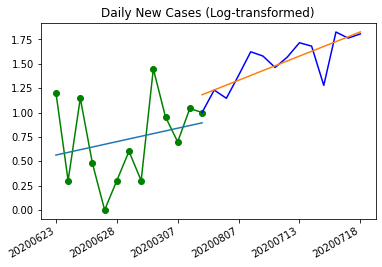

In [7]:
fig, ax = plt.subplots()
ax.plot(x1, y1, 'go-')
ax.plot(x1, m_1*x1_lab + b_1)

ax.plot(x2, y2, 'b')
ax.plot(x2, m_2*x2_lab + b_2)

tick_spacing = 5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title('Daily New Cases (Log-transformed)')

fig.autofmt_xdate()

plt.show()